<a href="https://colab.research.google.com/github/Ellen-Tuane/INPE_CAP413_Computational_Statistics/blob/main/CAP417_Hands_on_5_Discrete_Random_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP-417-3: Computational Statistics

Hands On 02

Prof. Valdivino Alexandre de Santiago Júnior

Ellen Tuane

Subject: Discrete Random Variables and Probability Distributions [1]


# 0. The Problem

The Global Precipitation Climatology Project (GPCP) is used as a reference dataset for accomplishing climate precipitation prediction. Consider part of one GPCP's dataset shown here. It has monthly data from 1980 to 2016.


The only relevant variable of this dataset for this exercise is press, the surface pressure (in millibars). Hence, each row in this dataset has data acquired in a location (latitude, longitude), in a certain year and month. Hence, first entry shows that in january/1980 in the specificied location (latitude and longitude), surface pressure (press) is 993.735 millibars, and in february/1980, in the same location, surface pressure is 995.384 millibars, and so on.


Note that the values of each variable, including press, are continuous (real numbers). But here, we will define a random variable representing the outcomes of high surface pressure measurements in one year. A high surface pressure happens when the pressure is greater than the average of surface pressure values considering all months, years, and locations.


Note that the discrete random variable described above can be perfectly considered a Poisson random variable since it satisfies all the properties of the Poisson process.

_________________________________________________________________________

The properties of the Poisson process are: [1]

* The number of outcomes occurring in one time interval or specified region of space is independent of the number that occur in any other disjoint time interval or region. In this sense we say that the Poisson process has no memory;

* The probability that a single outcome will occur during a very short time interval or in a small region is proportional to the length of the time interval or the size of the region and does not depend on the number of outcomes occurring outside this time interval or region;

* The probability that more than one outcome will occur in such a short time interval or fall in such a small region is negligible.





In [ ]:
! git clone https://github.com/vsantjr/CAP.git

Cloning into 'CAP'...
remote: Enumerating objects: 379, done.
remote: Total 379 (delta 0), reused 0 (delta 0), pack-reused 379
Receiving objects: 100% (379/379), 46.21 MiB | 38.13 MiB/s, done.
Resolving deltas: 100% (188/188), done.


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import collections as matcoll
import numpy as np
from scipy.stats import poisson
import math

In [ ]:
# read dataset
df = pd.read_excel('/content/CAP/CAP417/GPCP/gpcp_1980-2016.xlsx')

In [ ]:
df.head(500)

,year,month,lat,lon,temp850,press,shum850,t2m,u500,u850,v850,prgpcp
0,1980,1,-58.75,271.25,-2.65499,993.735,3.12400,4.968070,11.3675,6.60750,-0.915001,2.61009
1,1980,2,-58.75,271.25,-3.47750,995.384,2.92150,4.898020,10.6775,5.27499,-0.340000,3.24624
2,1980,3,-58.75,271.25,-4.87000,990.998,2.78050,3.880490,10.7350,6.76750,0.285000,3.96585
3,1980,4,-58.75,271.25,-4.39250,1006.920,2.71475,3.445750,7.9700,6.69250,2.377500,2.95227
4,1980,5,-58.75,271.25,-5.34500,993.502,2.73400,3.314030,4.4575,1.90750,-3.905000,3.26092
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1980,4,-56.25,313.75,-5.82750,996.921,2.44275,2.026170,21.5675,10.33750,3.640000,4.13558
496,1980,5,-56.25,313.75,-5.00500,1004.080,2.40900,0.879597,16.9825,9.57750,4.042500,3.34953
497,1980,6,-56.25,313.75,-8.20750,993.452,2.15125,0.019417,18.0275,9.74250,0.857498,3.40521
498,1980,7,-56.25,313.75,-11.23500,1000.690,1.39350,-4.547260,15.5250,8.75250,7.707500,3.15905


In [ ]:
df.describe()

,year,month,lat,lon,temp850,press,shum850,t2m,u500,u850,v850,prgpcp
count,298368.000000,298368.000000,298368.000000,298368.000000,298368.000000,298368.000000,298368.000000,298368.000000,298368.000000,298368.000000,298368.000000,298368.000000
mean,1998.000000,6.500000,-25.000000,300.000000,10.506898,987.537557,6.779083,17.003383,6.891379,1.494265,-0.156818,3.443623
std,10.677096,3.452058,20.194402,17.305495,8.084645,49.126809,3.470923,8.158967,10.096684,6.800825,2.320492,3.183081
min,1980.000000,1.000000,-58.750000,271.250000,-16.730000,679.165000,0.747749,-23.691700,-14.960000,-14.162500,-10.972500,0.000000
25%,1989.000000,3.750000,-41.875000,285.625000,3.947510,983.879750,3.512500,10.434150,-2.825223,-3.872500,-1.680060,1.027998
50%,1998.000000,6.500000,-25.000000,300.000000,14.152500,1003.350000,6.177750,19.078650,8.185000,0.677502,-0.192501,2.745455
75%,2007.000000,9.250000,-8.125000,314.375000,17.087500,1013.340000,10.034000,24.226100,15.807500,7.372500,1.250000,4.624422
max,2016.000000,12.000000,8.750000,328.750000,23.684300,1037.790000,18.617900,31.593100,30.680400,20.225000,10.515000,31.345700


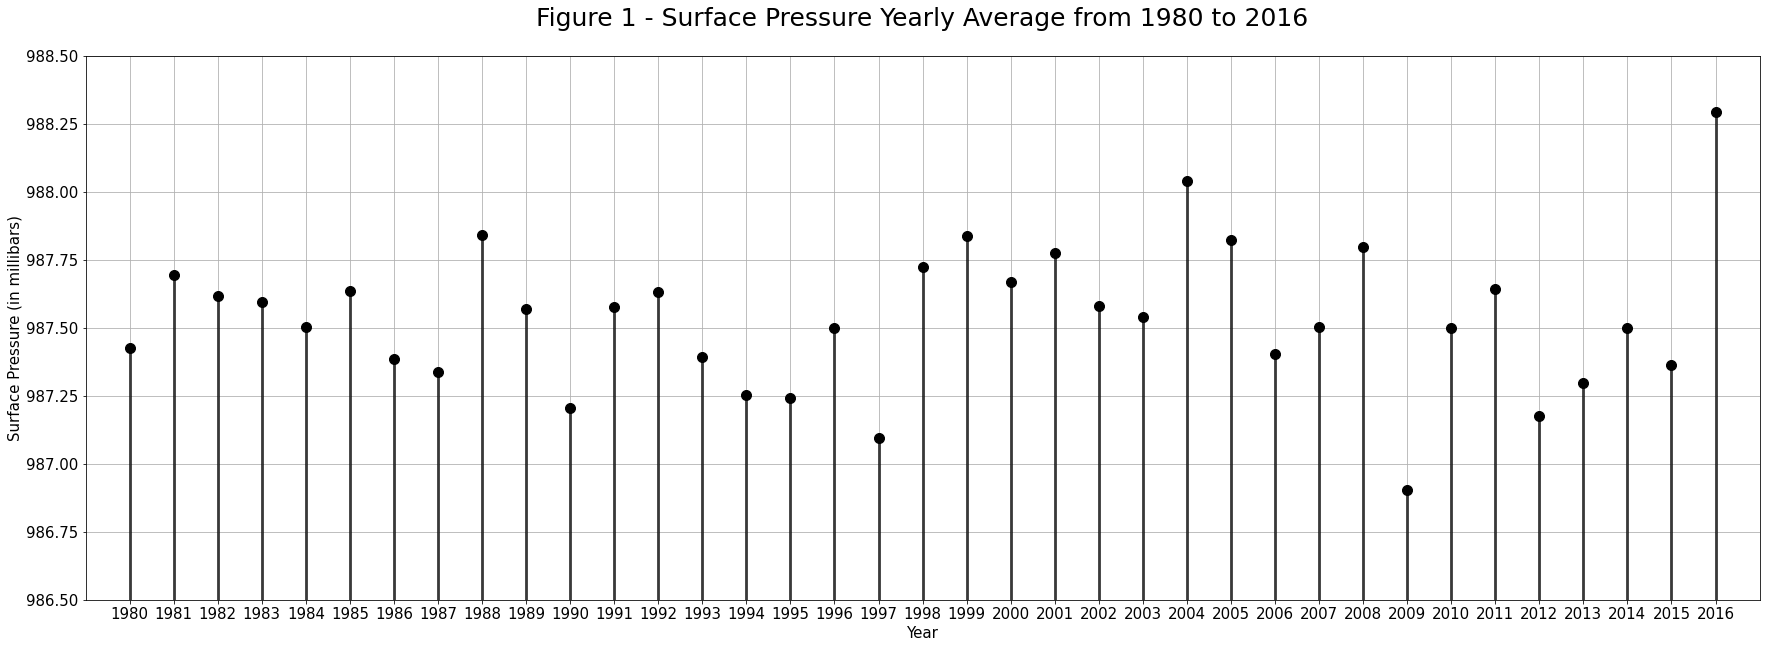

In [ ]:
#plot pressure time series
fig, ax = plt.subplots(figsize=(30, 10))

years = df.year.unique()

ax.plot(df.groupby('year')['press'].mean(),'bo', ms=10,color='k')
ax.vlines(years,0, df.groupby('year')['press'].mean(), colors='k', lw=3, alpha=0.7)

#ax.set_xlim(1980, 2016)
ax.set_ylim(986.5, 988.5)
ax.set_xlim(xmin=1979, xmax=2017)

plt.xticks(range(1980, 2017), size=15)
plt.yticks(size=15)
plt.xlabel('Year', size=15)
plt.ylabel('Surface Pressure (in millibars)', size=15)
plt.title('Figure 1 - Surface Pressure Yearly Average from 1980 to 2016', pad=30, size=25)
plt.grid()
plt.show()

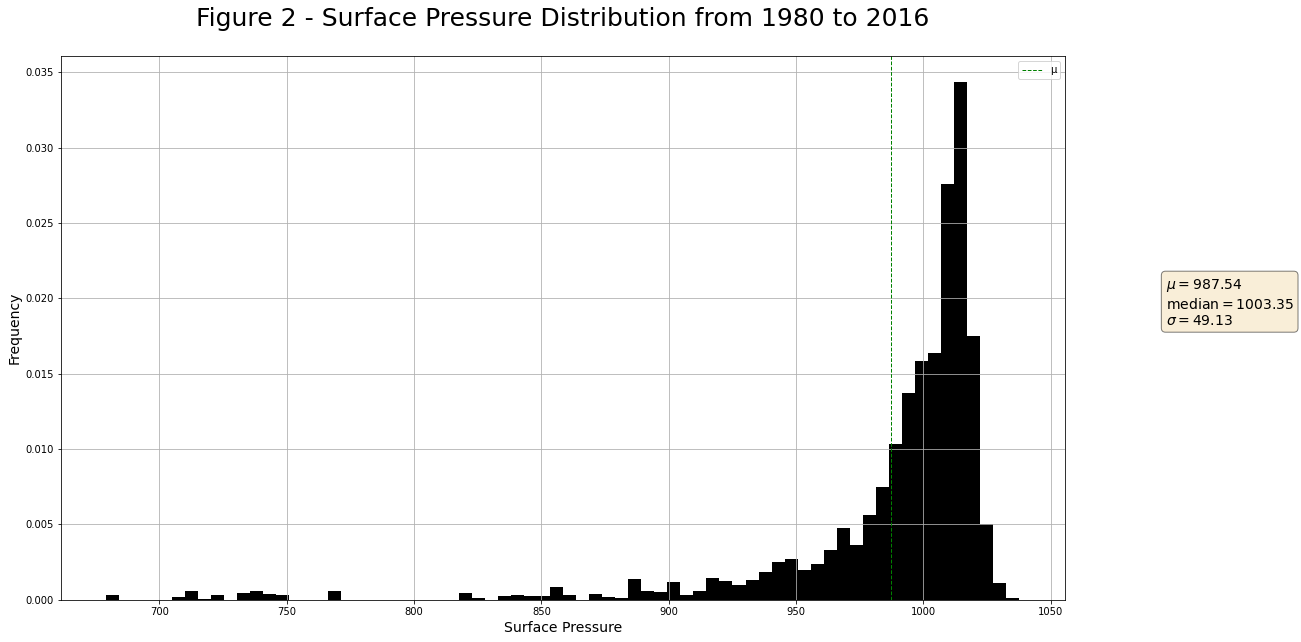

In [ ]:
#plot data distribuition
fig, axs = plt.subplots(figsize=(18, 10))

# set data
axs.hist(df.press, bins=70, density=True, color ='black')

# set text box and mean line
mu = np.mean(df.press)
median = np.median(df.press)
sigma = np.std(df.press)

textstr = '\n'.join((r'$\mu=%.2f$' % (mu, ), r'$\mathrm{median}=%.2f$' % (median, ), r'$\sigma=%.2f$' % (sigma, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axs.text(1.1, 0.5, textstr, transform=axs.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)  
axs.axvline(mu, color='g', linestyle='dashed', linewidth=1)

#Create labels 
axs.set_xlabel('Surface Pressure', size=14)
axs.set_ylabel('Frequency', size=14)

# set title
plt.title('Figure 2 - Surface Pressure Distribution from 1980 to 2016', pad=30, size=25)
plt.legend(["μ"])
plt.grid()
plt.show()

# 1. Develop a program that can answer the following questions:

In [ ]:
# calculating average per year
mu = int(df.press.mean())
print(f"The historical frequency of surface pressure is {mu} millibars per year")

The historical frequency of surface pressure is 987 millibars per year


# 1.1 What is the probability that the outcomes of high surface pressure measurements in one year is greater than 5,600 ?

In [ ]:
# mathematically: k ≥ x
# 1 - cdf P(X ≤ x)
k1 = 5600
p1 = poisson.sf(k1, mu)
print(f"Probability that the outcomes of high surface presure measurments in one year is greater than 5,600 is {p1}")

Probability that the outcomes of high surface presure measurments in one year is greater than 5,600 is 0.0


# 1.2 What is the probability that the outcomes of high surface pressure measurements in one year is exactly 5,830?

In [ ]:
# mathematically: k = x
# pmf P(X = x)
k2 = 5830
p2 = poisson.pmf(k2, mu)
print(f"Probability that the outcomes of high surface presure measurments in one year is = 5,830 is {p2}")

Probability that the outcomes of high surface presure measurments in one year is = 5,830 is 0.0


# 1.3 What is the probability that the outcomes of high surface pressure measurements in one year is less than or equal to 10,000?

In [ ]:
# mathematically: k ≤ x
# cdf P(X ≤ x)
k3 = 10000
p3 = poisson.cdf(k3, mu)
print(f"Probability that the outcomes of high surface presure measurments in one year is ≤ 10,000 is {p3}")

Probability that the outcomes of high surface presure measurments in one year is ≤ 10,000 is 1.0


# 1.4 What is the probability that the outcomes of high surface pressure measurements in one year is greater than 5,900?

In [ ]:
# mathematically: k ≥ x
# 1 - cdf P(X ≤ x)
k4 = 5900
p4 = poisson.sf(k4, mu)
print(f"Probability that the outcomes of high surface presure measurments in one year is greater than 5,600 is {p4}")

Probability that the outcomes of high surface presure measurments in one year is greater than 5,600 is 0.0


# 1.5 PMF

In [ ]:
d1 = np.random.poisson(mu, 10000)

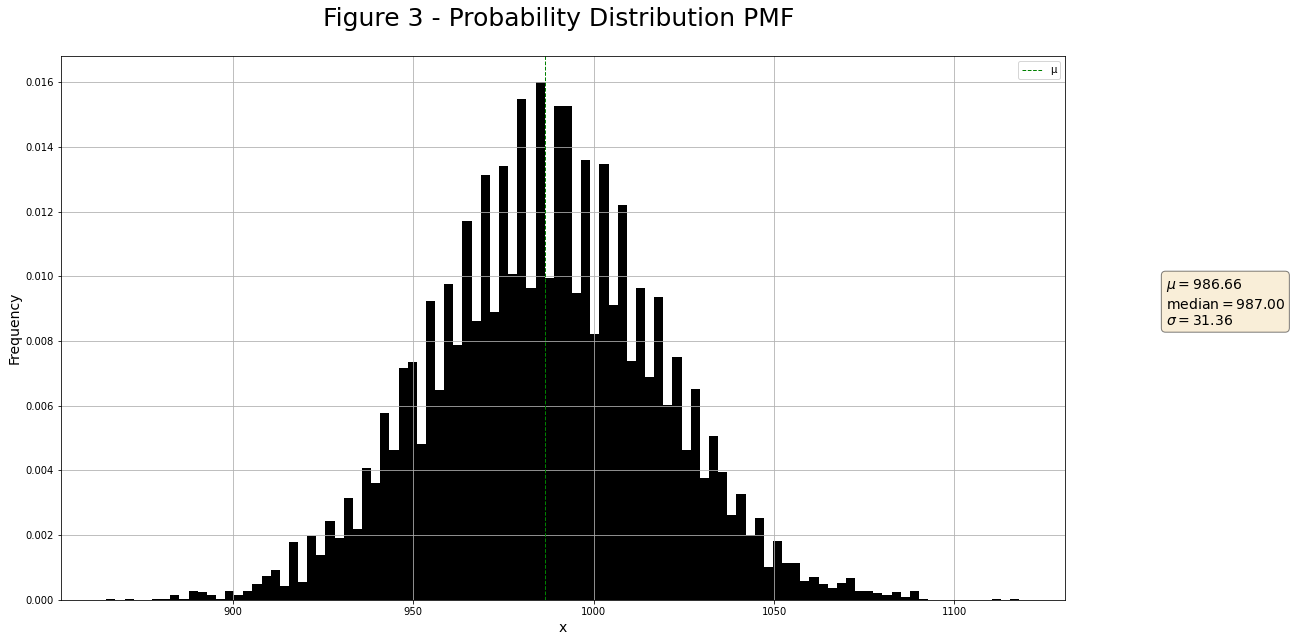

In [ ]:
#plot data distribuition
fig, axs = plt.subplots(figsize=(18, 10))

# set data
axs.hist(d1, bins=100, density=True, color ='k')

# set text box and mean line
mu = np.mean(d1)
median = np.median(d1)
sigma = np.std(d1)

textstr = '\n'.join((r'$\mu=%.2f$' % (mu, ), r'$\mathrm{median}=%.2f$' % (median, ), r'$\sigma=%.2f$' % (sigma, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axs.text(1.1, 0.5, textstr, transform=axs.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)  
axs.axvline(mu, color='g', linestyle='dashed', linewidth=1)

#Create labels 
axs.set_xlabel('x', size=14)
axs.set_ylabel('Frequency', size=14)

# set title
plt.title('Figure 3 - Probability Distribution PMF ', pad=30, size=25)
plt.legend(["μ"])
plt.grid()
plt.show()

#1.6 CDF

In [ ]:
a = np.arange(mu - 70, mu + 200)
a = a.astype(int)
d2 = poisson.cdf(a, mu) * 100
d2 = d2.astype(int)
min(a)

916

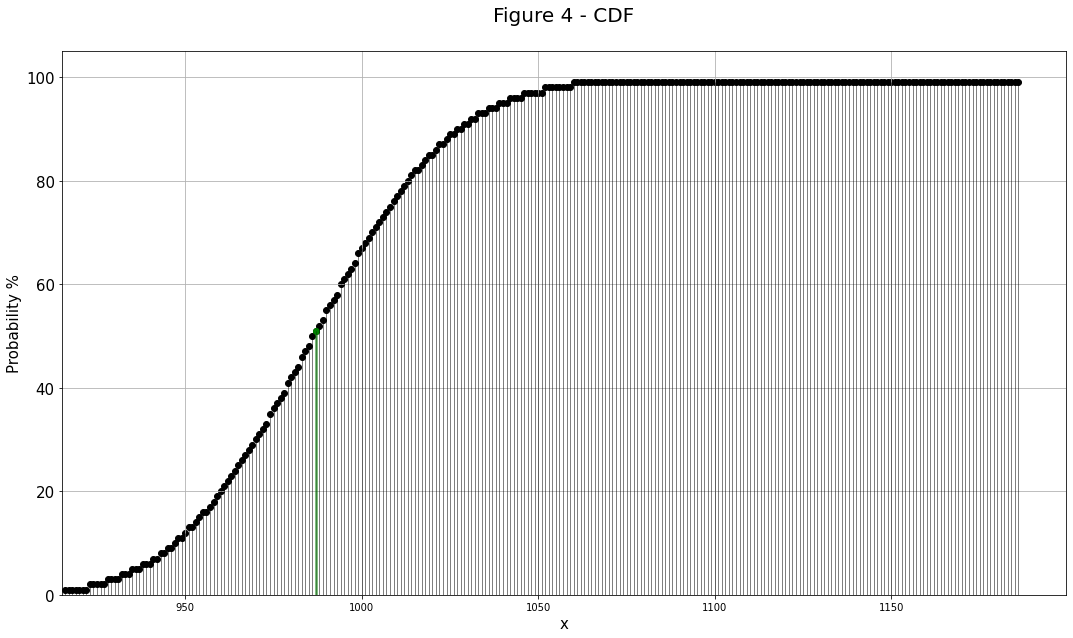

In [ ]:
fig, axs = plt.subplots(figsize=(18, 10))

axs.scatter(a, d2,color='k')
axs.vlines(a, 0, d2, colors='k', lw=1, alpha=0.5)

axs.scatter(987, 51,color='g')
axs.vlines(987, 0, 51, colors='g', lw=3, alpha=0.5)

axs.spines['bottom'].set_position('zero')
axs.set_xlim(xmin=915)
axs.set_ylim(ymin=0, ymax=105)

plt.yticks(size=15)
plt.xlabel('x', size=15)
plt.ylabel('Probability %', size=15)
plt.title('Figure 4 - CDF', pad=30, size=20)
plt.grid()
plt.show()

# 1.7 Inverse CDF




In [ ]:
b = np.arange(mu - 70, mu + 200)
b = b.astype(int)
d3 = poisson.sf(b, mu) * 100
d3 = d3.astype(int)

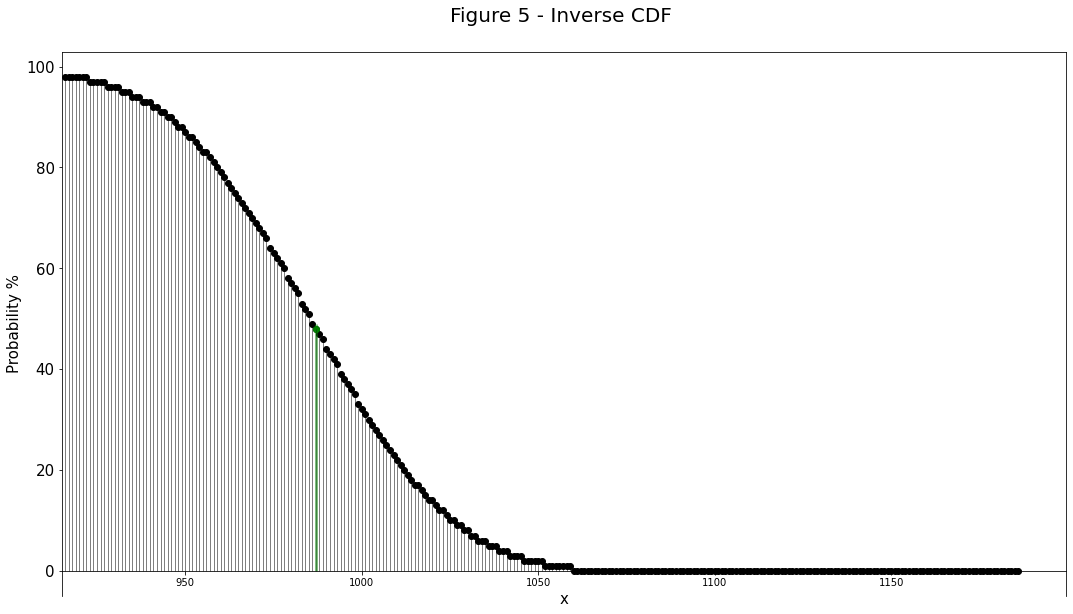

In [ ]:
fig, axs = plt.subplots(figsize=(18, 10))

axs.scatter(b, d3,color='k')
axs.vlines(b, 0, d3, colors='k', lw=1, alpha=0.5)

axs.scatter(987, 48,color='g')
axs.vlines(987, 0, 49, colors='g', lw=3, alpha=0.5)

axs.spines['bottom'].set_position('zero')
axs.set_xlim(xmin=915)

plt.yticks(size=15)
plt.xlabel('x', size=15)
plt.ylabel('Probability %', size=15)
plt.title('Figure 5 - Inverse CDF ', pad=30, size=20)
plt.show()

# 2. Conclusion

 It is observed in the figure 5 that the probability of high surface pressure outcome measurements be greater than 1050 millibars reaches out to 0. While in figure 4, the opposite is noticible, the probability of high surface pressure outcome measurements be less 1050 millibars reaches out to 100%. For these reasons, the probability of being greater than 5600 and 5900 millibars is iqual to 0, and being less than 10000 millibars is iqual to 1. Now, considering the the probability distribution in figure 3, the probability of the high pressure being exactly the given x reaches out to 0 when x < 900  and x > 1100, therefore the probability of high surface pressure outcome measurements be exaclty 5600 millibars tends to 0.

#3. References:

[1] Discrete Random Variables and Probability Distributions. Available at: https://github.com/vsantjr/CAP/blob/master/CAP417/Material/CAP-417_Estatistica%20Computacional_Prof%20Valdivino_A02.ipynb. Accessed on: Abr 22, 22.

[2] V. A. Santiago Júnior. CAP-417: Estatística Computacional (Computational Statistics), 2022. Acessed on: Abr 22, 22. Available at: https://github.com/vsantjr/CAP/tree/master/CAP417.

[3] Poisson Distribution and Poisson Process in Python. Available at: https://pyshark.com/poisson-distribution-and-poisson-process-in-python/. Accessed on: Abr 22, 22.

[4] API reference: scipy.stats.poisson. Available at:https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html. Accessed on: Abr 22, 22.

[5]The Poisson Distribution and Poisson Process Explained. Available at:https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459. Accessed on: Abr 22, 22.

[6]Poisson Process. https://dlsun.github.io/probability/poisson-process.html#def:pp. Available at:https://dlsun.github.io/probability/poisson-process.html#def:pp. Accessed on: Abr 22, 22.
